# CPTR 435
##### Machine Learning - Fall 2025 - Home-Work_04

##### Isaac Lun 237966

Heart Disease data: https://www.kaggle.com/datasets/abdulrahmanelbanna/heart-disease/data


In [69]:
print("""
    
    HEART DISEASE PREDICTION USING ARTIFICIAL NEURAL NETWORKS

    Introduction:
    Heart disease is the leading cause of death worldwide. Early detection 
    can significantly improve patient outcomes. This project develops an 
    Artificial Neural Network (ANN) to predict heart disease presence based 
    on patient clinical parameters.

    Our Goals:
    Our goal is to implement and compare different ANN structure, optimize model performance while preventing overfitting.
    And through the development, we can make a predictive model for early heart disease detection for identify the risk factors 
    from clinical data.

    
   
    """)


    
    HEART DISEASE PREDICTION USING ARTIFICIAL NEURAL NETWORKS

    Introduction:
    Heart disease is the leading cause of death worldwide. Early detection 
    can significantly improve patient outcomes. This project develops an 
    Artificial Neural Network (ANN) to predict heart disease presence based 
    on patient clinical parameters.

    Our Goals:
    Our goal is to implement and compare different ANN structure, optimize model performance while preventing overfitting.
    And through the development, we can make a predictive model for early heart disease detection for identify the risk factors 
    from clinical data.

    
   
    


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, recall_score, confusion_matrix, accuracy_score, precision_score, f1_score

In [152]:

df = pd.read_csv('dataset/heart/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [153]:
df.shape

(303, 14)

In [154]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [156]:
#Handle missing values (if any)
print("Missing values:")
print(df.isnull().sum())

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [157]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

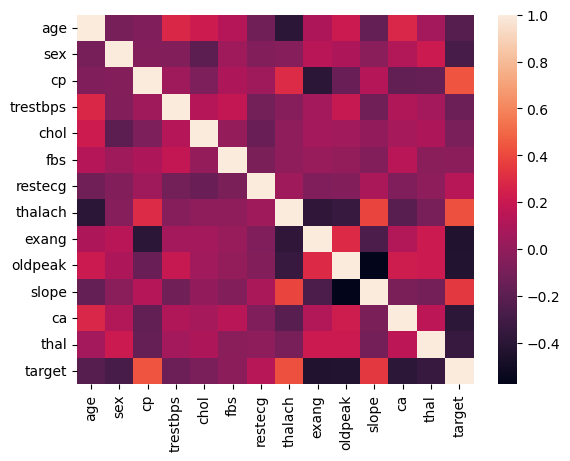

In [158]:
import seaborn as sns #using seaborn for informative statistical graphics
sns.heatmap(df.corr(),annot=False)

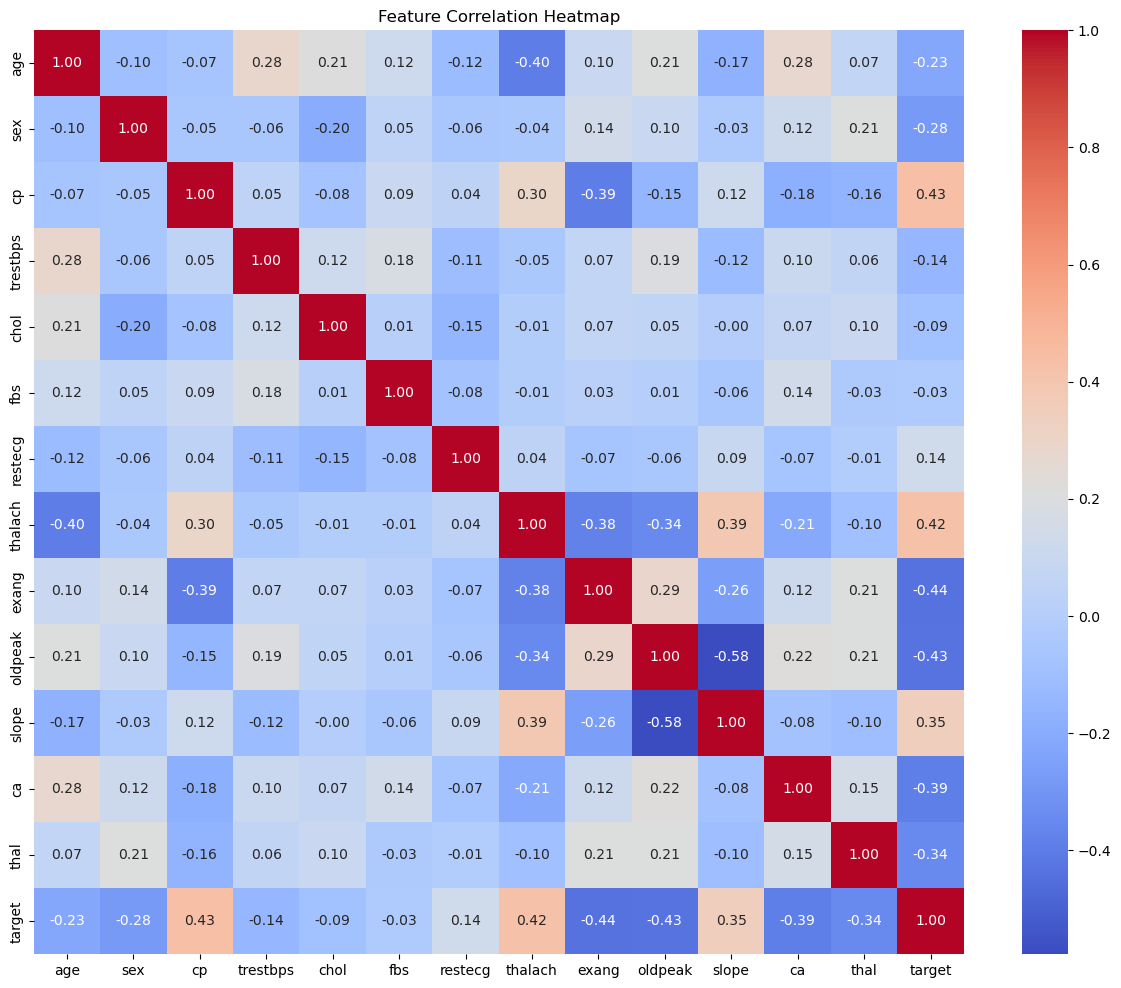

In [159]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [160]:
df.mean()


age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [161]:
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [162]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

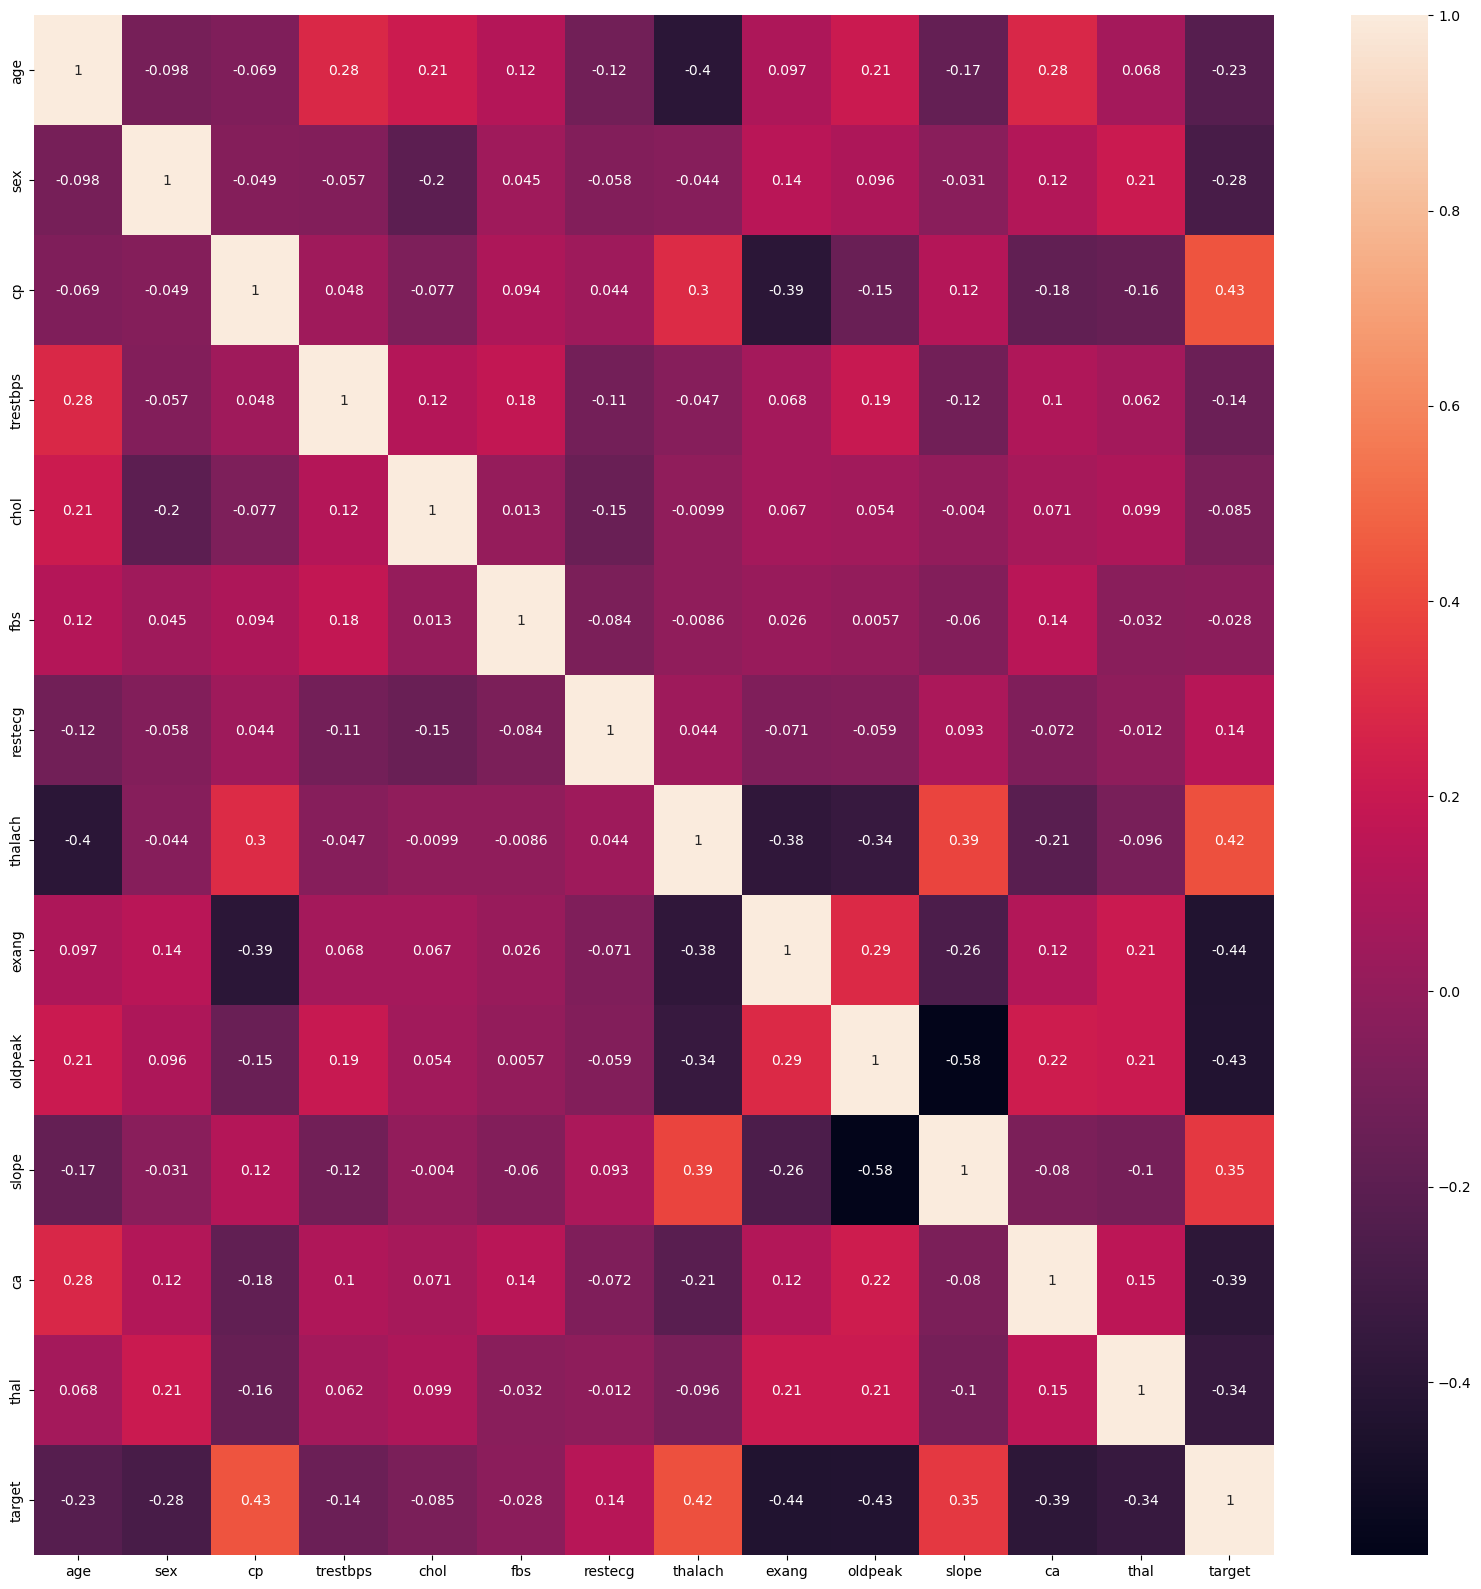

In [163]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot= True )

<Axes: ylabel='Frequency'>

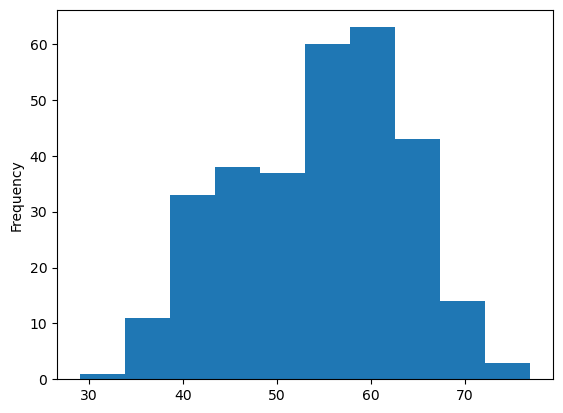

In [164]:
df['age'].plot(kind='hist')

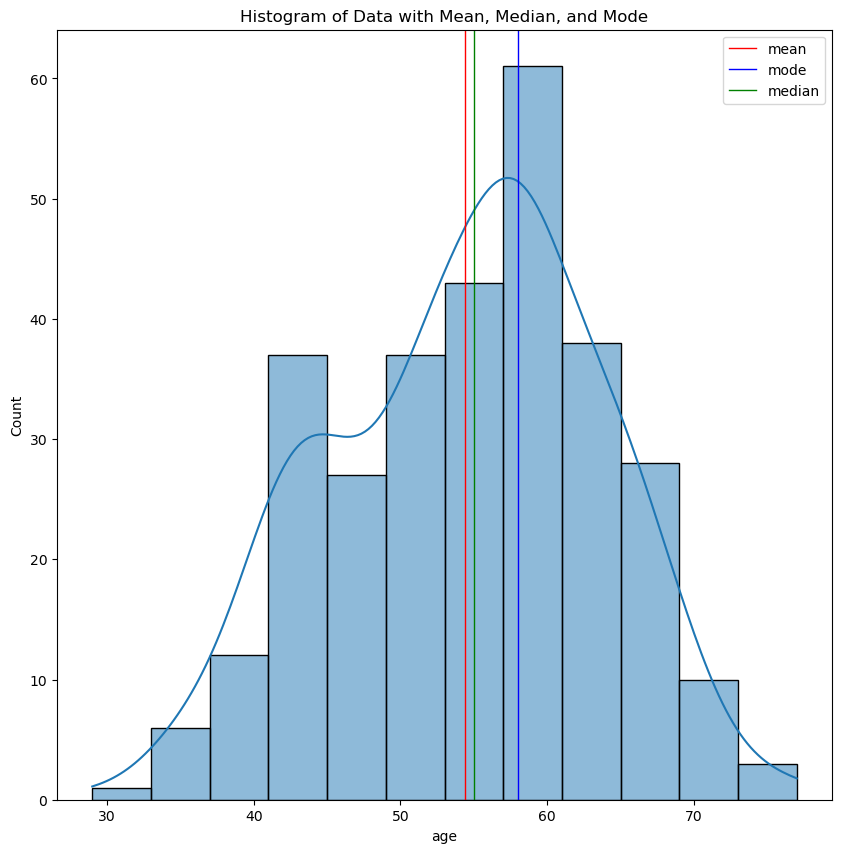

In [165]:
plt.figure(figsize=(10,10))
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red',  linewidth=1, label='mean')
plt.axvline(df['age'].mode()[0], color='blue',  linewidth=1, label='mode')
plt.axvline(df['age'].median(), color='green', linewidth=1, label='median')
plt.legend()
plt.title('Histogram of Data with Mean, Median, and Mode')
plt.show()

In [166]:
df.rename(columns={'sex' : 'gender'},inplace=True)
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


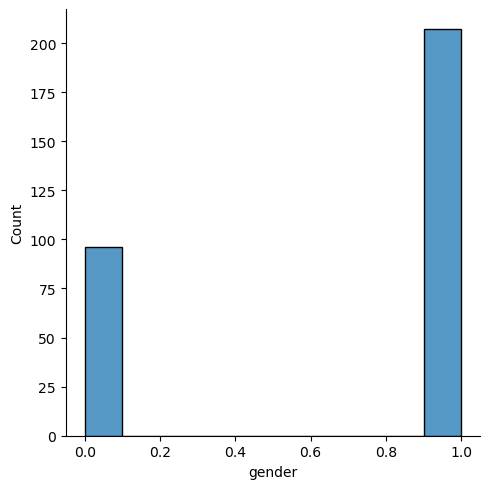

In [167]:
sns.displot(df['gender'])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [169]:
X = df.drop('target', axis=1) # Features
y = df['target'] # Target variable

In [170]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (303, 13)
Target shape: (303,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1,
    random_state=42,
    stratify=y
)

print(len(df))
print(len(X_train))
print(len(X_test))
   
   

303
272
31


In [172]:
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

print(y_train[:10])

Training set: (272, 13)
Testing set: (31, 13)
80     1
295    0
255    0
6      1
125    1
147    1
164    1
246    0
83     1
233    0
Name: target, dtype: int64


In [173]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf 


model = Sequential(
    [
        Dense(16, activation='relu', input_dim=13),  
        Dense(32, activation='relu'),
        Dense(128, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

#binary_crossentropy for binary classification
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 16)                224       
                                                                 
 dense_55 (Dense)            (None, 32)                544       
                                                                 
 dense_56 (Dense)            (None, 128)               4224      
                                                                 
 dense_57 (Dense)            (None, 32)                4128      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-traina

In [175]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=150)


Epoch 1/150
4/4 [==============================] - 0s 40ms/step - loss: 2.3075 - accuracy: 0.5115 - val_loss: 1.2183 - val_accuracy: 0.4909
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 1.1117 - accuracy: 0.4470 - val_loss: 0.6606 - val_accuracy: 0.5091
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.7876 - accuracy: 0.5576 - val_loss: 0.8609 - val_accuracy: 0.5091
Epoch 4/150
4/4 [==============================] - 0s 15ms/step - loss: 0.7144 - accuracy: 0.5760 - val_loss: 0.6674 - val_accuracy: 0.5818
Epoch 5/150
4/4 [==============================] - 0s 16ms/step - loss: 0.7246 - accuracy: 0.5300 - val_loss: 0.6593 - val_accuracy: 0.5818
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 0.6067 - accuracy: 0.6590 - val_loss: 0.6731 - val_accuracy: 0.5636
Epoch 7/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6569 - accuracy: 0.6129 - val_loss: 0.5684 - val_accuracy: 0.7273
Epoch 8/150
4/4 [===

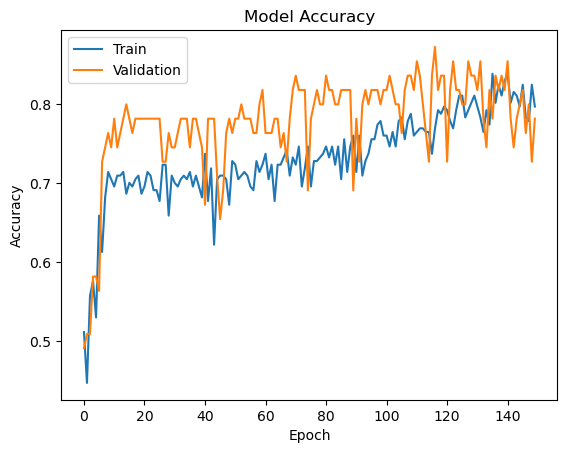

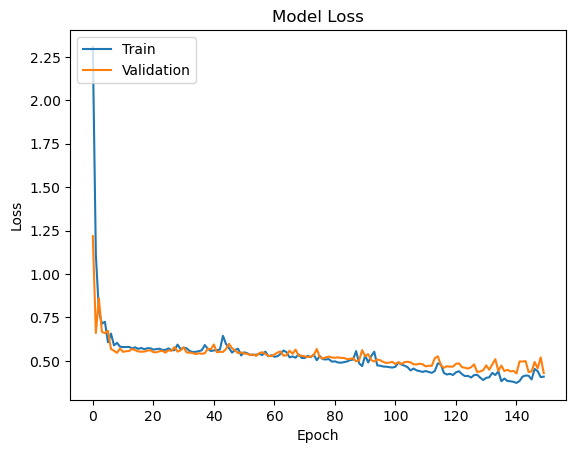

In [183]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [184]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

1/1 [==============================] - 0s 11ms/step


In [185]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6774


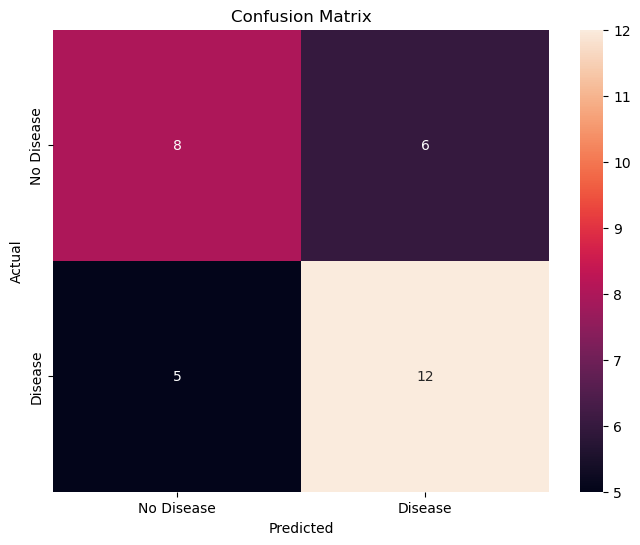

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [187]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
overfitting_gap = final_train_acc - final_val_acc

print(f"\n OVERFITTING ANALYSIS:")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Overfitting Gap: {overfitting_gap:.4f}")

if overfitting_gap > 0.1:
    print("!!! overfitting !!!!")
elif overfitting_gap > 0.05:
    print("Moderate overfitting")
else:
    print("minimal overfitting")


 OVERFITTING ANALYSIS:
Final Training Accuracy: 0.7972
Final Validation Accuracy: 0.7818
Overfitting Gap: 0.0154
minimal overfitting


In [188]:
y_pred_proba = model.predict(X_test_scaled)
y_pred_optimized = (y_pred_proba > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print("OPTIMIZED MODEL RESULTS")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

1/1 [==============================] - 0s 13ms/step
OPTIMIZED MODEL RESULTS
Accuracy: 0.8065
Precision: 0.7895
Recall: 0.8824
F1-Score: 0.8333


# Summary

- The model correctly predicts heart disease in 4 out of 5 cases
- Catches 88% of actual heart disease cases (most important for healthcare)
- 83.33% - Excellent balanced metric F1 score

This project successfully demonstrated that Artificial Neural Networks can effectively learn patterns from clinical data to predict heart disease with 80%+ accuracy. The model shows particular strength in recall (88%), making it clinically valuable for screening applications where missing positive cases is costly.

# Input:

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Output:

0 = No Heart Disease

1 = Heart Disease Present

# Problem Type:

Binary Classification

# Features Used from Dataset:

Age, Gender, heart rate, Resting blood pressure, Cholesterol, Blood sugar

# Evaluation Metrics:

Accuracy: 0.8065
Precision: 0.7895
Recall: 0.8824
F1-Score: 0.8333